In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
billions1=pd.read_csv('forbes_billionaires.csv')

In [3]:
billions1.head()

,Name,NetWorth,Country,Source,Rank,Age,Residence,Citizenship,Status,Children,Education,Self_made
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,"Seattle, Washington",United States,In Relationship,4.0,"Bachelor of Arts/Science, Princeton University",True
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,"Austin, Texas",United States,In Relationship,7.0,"Bachelor of Arts/Science, University of Pennsy...",True
2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,"Paris, France",France,Married,5.0,"Bachelor of Arts/Science, Ecole Polytechnique ...",False
3,Bill Gates,124.0,United States,Microsoft,4,65.0,"Medina, Washington",United States,Divorced,3.0,"Drop Out, Harvard University",True
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,"Palo Alto, California",United States,Married,2.0,"Drop Out, Harvard University",True


In [4]:
billions1.tail()

,Name,NetWorth,Country,Source,Rank,Age,Residence,Citizenship,Status,Children,Education,Self_made
2750,Daniel Yong Zhang,1.0,China,e-commerce,2674,49.0,"Hangzhou, China",China,NaN,NaN,NaN,True
2751,Zhang Yuqiang,1.0,China,Fiberglass,2674,65.0,"Tongxiang, China",China,NaN,NaN,NaN,True
2752,Zhao Meiguang,1.0,China,gold mining,2674,58.0,"Jilin, China",China,NaN,NaN,NaN,True
2753,Zhong Naixiong,1.0,China,conglomerate,2674,58.0,"Foshan, China",China,NaN,NaN,NaN,True
2754,Zhou Wei family,1.0,China,Software,2674,54.0,"Shanghai, China",China,Married,NaN,NaN,True


In [5]:
billions1.columns

Index(['Name', 'NetWorth', 'Country', 'Source', 'Rank', 'Age', 'Residence',
       'Citizenship', 'Status', 'Children', 'Education', 'Self_made'],
      dtype='object')

In [6]:
billions1.describe()

,NetWorth,Rank,Age,Children
count,2755.000000,2755.000000,2630.00000,1552.000000
mean,4.749220,1345.663521,63.26730,2.978093
std,9.615358,772.669811,13.47916,1.618569
min,1.000000,1.000000,18.00000,1.000000
25%,1.500000,680.000000,54.00000,2.000000
50%,2.300000,1362.000000,63.00000,3.000000
75%,4.200000,2035.000000,73.00000,4.000000
max,177.000000,2674.000000,99.00000,23.000000


In [7]:
billions1.isnull().sum()

Name              0
NetWorth          0
Country           0
Source            0
Rank              0
Age             125
Residence        40
Citizenship      16
Status          665
Children       1203
Education      1346
Self_made        18
dtype: int64

In [8]:
billions1.dropna()

,Name,NetWorth,Country,Source,Rank,Age,Residence,Citizenship,Status,Children,Education,Self_made
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,"Seattle, Washington",United States,In Relationship,4.0,"Bachelor of Arts/Science, Princeton University",True
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,"Austin, Texas",United States,In Relationship,7.0,"Bachelor of Arts/Science, University of Pennsy...",True
2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,"Paris, France",France,Married,5.0,"Bachelor of Arts/Science, Ecole Polytechnique ...",False
3,Bill Gates,124.0,United States,Microsoft,4,65.0,"Medina, Washington",United States,Divorced,3.0,"Drop Out, Harvard University",True
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,"Palo Alto, California",United States,Married,2.0,"Drop Out, Harvard University",True
...,...,...,...,...,...,...,...,...,...,...,...,...
2736,Surin Upatkoon,1.0,Thailand,"telecom, lotteries, insurance",2674,72.0,"Kuala Lumpur, Malaysia",Thailand,Married,3.0,High School,True
2737,Ruben Vardanyan,1.0,Russia,investment banking,2674,52.0,"Moscow, Russia",Russia,Married,4.0,"Master of Science, Moscow State University",True
2742,J. Wayne Weaver,1.0,United States,Shoes,2674,85.0,"Jacksonville, Florida",United States,Married,2.0,"Bachelor of Science, University of Florida",True
2743,Sandy Weill,1.0,United States,Citigroup,2674,88.0,"Sonoma, California",United States,Married,2.0,"Bachelor of Arts/Science, Cornell University",True


In [9]:
billions1['Status'].value_counts()

Married               1734
Divorced               144
Widowed                 95
Single                  74
In Relationship         21
Separated               10
Widowed, Remarried       8
Engaged                  4
Name: Status, dtype: int64

In [10]:
billions1['Self_made'].value_counts()

True     1960
False     777
Name: Self_made, dtype: int64

In [11]:
dataset_clean = {"Self_made":   {"True": 1, "False": 0},
                "Status": {"Married":2, "Divorced": 3, "Widowed": 4, "Single": 5,
                                  "In Relationship": 6, "Separated": 7, "Widowed,Remarried":8,"Engaged":9 }}


In [12]:
billions = billions1.replace(dataset_clean)
billions.head()

,Name,NetWorth,Country,Source,Rank,Age,Residence,Citizenship,Status,Children,Education,Self_made
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,"Seattle, Washington",United States,6,4.0,"Bachelor of Arts/Science, Princeton University",True
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,"Austin, Texas",United States,6,7.0,"Bachelor of Arts/Science, University of Pennsy...",True
2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,"Paris, France",France,2,5.0,"Bachelor of Arts/Science, Ecole Polytechnique ...",False
3,Bill Gates,124.0,United States,Microsoft,4,65.0,"Medina, Washington",United States,3,3.0,"Drop Out, Harvard University",True
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,"Palo Alto, California",United States,2,2.0,"Drop Out, Harvard University",True


In [13]:
billions['NetWorth'].min()

1.0

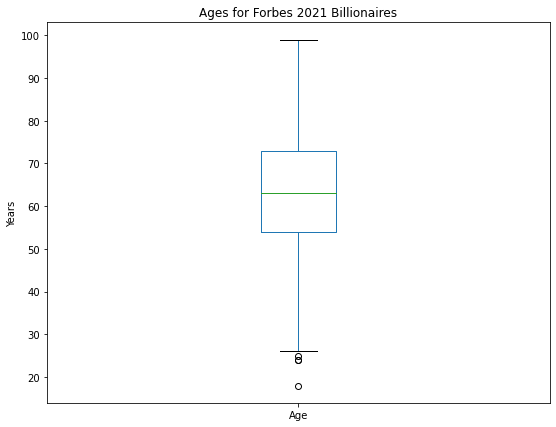

In [14]:
x=billions['Age']
x.plot(kind='box', figsize=(9, 7))

plt.title('Ages for Forbes 2021 Billionaires')

plt.style.use('seaborn-dark-palette')

plt.ylabel('Years')

plt.savefig('Ages for Forbes 2021 Billionaires.png')

plt.show()

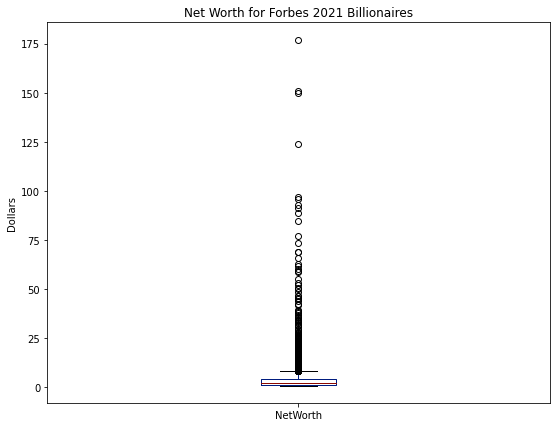

In [15]:
y=billions['NetWorth']
y.plot(kind='box', figsize=(9, 7))

plt.title('Net Worth for Forbes 2021 Billionaires')

plt.style.use('seaborn-notebook')

plt.ylabel('Dollars')

plt.savefig('Net Worth for Forbes 2021 Billionaires.png')

plt.show()

In [16]:
pie_status=billions1.groupby('Status',axis=0).sum()
pie_status.head()

,NetWorth,Rank,Age,Children
Status,,,,
Divorced,837.7,175324,9478.0,365.0
Engaged,6.9,8137,208.0,4.0
In Relationship,545.4,20375,1209.0,55.0
Married,8282.8,2247961,111228.0,3778.0
Separated,18.6,18544,543.0,28.0


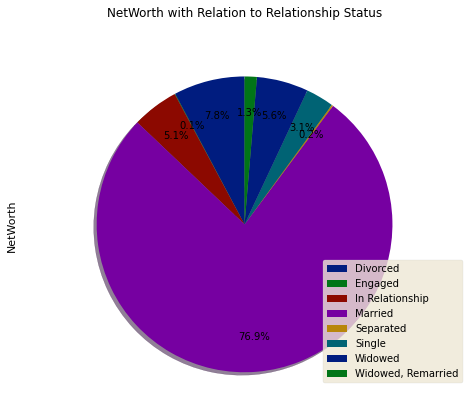

In [17]:


pie_status['NetWorth'].plot(kind='pie',
                            figsize=(8, 6),
                            autopct='%1.1f%%', 
                            startangle=90,     
                            shadow=True, pctdistance=0.76,labels=None)


plt.title('NetWorth with Relation to Relationship Status',y=1.12)

plt.axis('equal') 

plt.style.use('Solarize_Light2')

plt.legend(labels=pie_status.index, loc='lower right') 

plt.savefig('NetWorth with Relation to Relationship Status.png')

plt.show()

In [18]:
bar_self=billions1.groupby('Self_made',axis=0).sum()
bar_self.head()

,NetWorth,Rank,Age,Children
Self_made,,,,
False,3876.5,992245,47611.0,1488.0
True,9151.1,2687382,118753.0,3134.0


In [19]:
bar_self1=bar_self.drop('Age',axis=1)

In [20]:
bar_self2=bar_self1.drop('Children',axis=1)

In [21]:
bar_self3=bar_self2.drop('Rank',axis=1)
bar_self3

,NetWorth
Self_made,
False,3876.5
True,9151.1


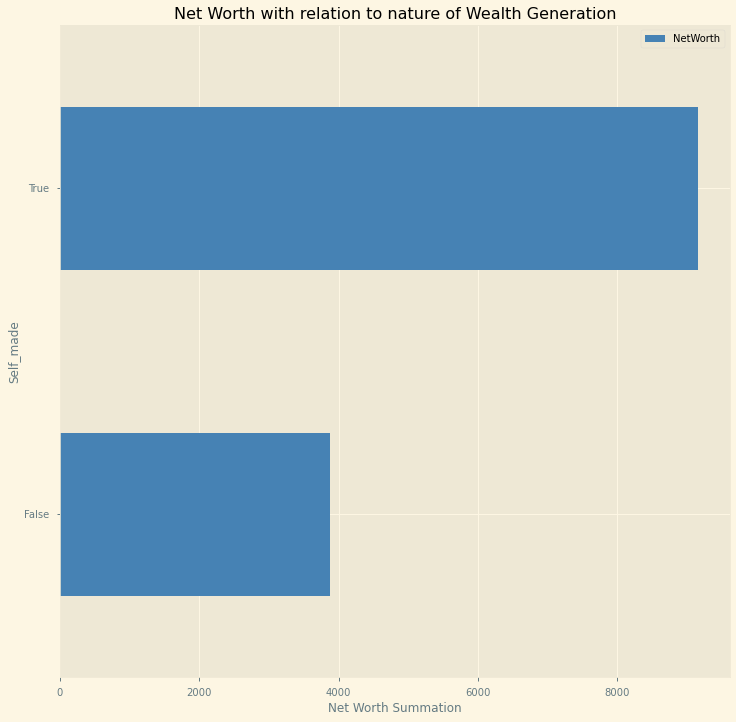

In [22]:
bar_self3.plot(kind='barh', 
              figsize=(12, 12), 
              color='steelblue')

plt.xlabel('Net Worth Summation')

plt.title('Net Worth with relation to nature of Wealth Generation')

plt.style.use('seaborn-pastel')

plt.savefig('Net Worth with relation to nature of Wealth Generation.png')




plt.legend()

plt.show()

In [23]:
import warnings

import seaborn as sns

import statsmodels.formula.api as smf

from statsmodels.tools.eval_measures import rmse

from sklearn.linear_model import LinearRegression

import statsmodels.api as sm 

sns.set(color_codes=True)
warnings.filterwarnings('ignore')

In [24]:
billionaires=billions1[['NetWorth','Age']]
billionaires.head()

,NetWorth,Age
0,177.0,57.0
1,151.0,49.0
2,150.0,72.0
3,124.0,65.0
4,97.0,36.0


In [25]:
stats_model = smf.ols('NetWorth ~ Age', data=billionaires)
stats_model = stats_model.fit()

In [26]:
stats_model.params

Intercept    3.298333
Age          0.023656
dtype: float64

In [57]:
plt.savefig('Age model.png')
stats_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               NetWorth   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.791
Date:                Mon, 17 May 2021   Prob (F-statistic):             0.0949
Time:                        22:22:57   Log-Likelihood:                -9729.8
No. Observations:                2630   AIC:                         1.946e+04
Df Residuals:                    2628   BIC:                         1.948e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.2983      0.916      3.601      0.000       1.502       5.094
Age            0.0237      0.014      1.671      0.095      -0.004       0.051
==============================================================================
Omnibus:                     3806.875   Durbin-Watson:                   0.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1190550.238
Skew:                           8.591   Prob(JB):                         0.00
Kurtosis:                     105.806   Cond. No.                         311.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Figure size 576x396 with 0 Axes>

In [28]:
stats_model.rsquared

0.0010609153013453332

In [29]:
stats_model.rsquared_adj

0.0006808014943823215

In [30]:
stats_model.conf_int()

,0,1
Intercept,1.502277,5.094390
Age,-0.004110,0.051421


In [31]:
stats_model.pvalues

Intercept    0.000323
Age          0.094911
dtype: float64

<Figure size 576x396 with 0 Axes>

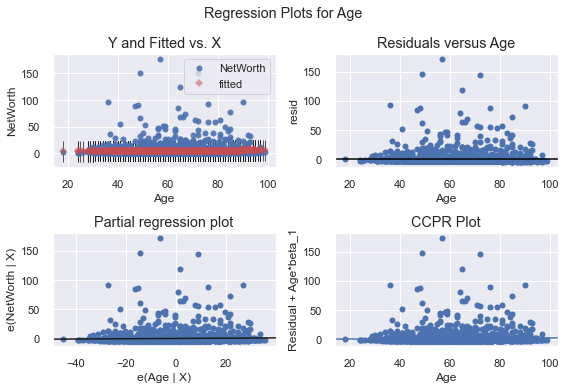

In [58]:
plt.savefig('Regression Plots for Age.png')
figure=sm.graphics.plot_regress_exog(stats_model,"Age")
figure.tight_layout(pad=1.0)

<Figure size 576x396 with 0 Axes>

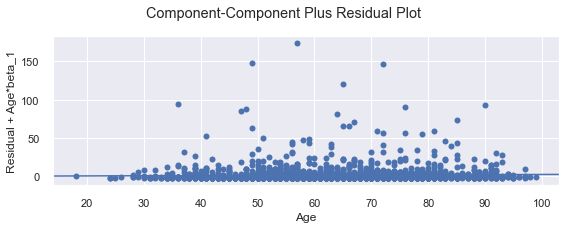

In [33]:
plt.savefig('CCPR Plot for Age Model.png')
figure5=sm.graphics.plot_ccpr_grid(stats_model)
figure5.tight_layout(pad=1.0)

In [34]:
billionaires2=billions1[['NetWorth','Status']]
billionaires2.head()

,NetWorth,Status
0,177.0,In Relationship
1,151.0,In Relationship
2,150.0,Married
3,124.0,Divorced
4,97.0,Married


In [35]:
model = smf.ols('NetWorth ~ Status', data=billionaires2)
model = model.fit()

In [36]:
model.params

Intercept                        5.817361
Status[T.Engaged]               -4.092361
Status[T.In Relationship]       20.154067
Status[T.Married]               -1.040660
Status[T.Separated]             -3.957361
Status[T.Single]                -1.367361
Status[T.Widowed]                0.581586
Status[T.Widowed, Remarried]    12.182639
dtype: float64

In [37]:
plt.savefig(' Marital Status model.png')
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               NetWorth   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     14.79
Date:                Mon, 17 May 2021   Prob (F-statistic):           6.26e-19
Time:                        22:18:42   Log-Likelihood:                -7844.1
No. Observations:                2090   AIC:                         1.570e+04
Df Residuals:                    2082   BIC:                         1.575e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        5.8174      0.862      6.750      0.000       4.127       7.507
Status[T.Engaged]               -4.0924      5.242     -0.781      0.435     -14.373       6.188
Status[T.In Relationship]       20.1541      2.416      8.343      0.000      15.417      24.891
Status[T.Married]               -1.0407      0.897     -1.160      0.246      -2.799       0.718
Status[T.Separated]             -3.9574      3.382     -1.170      0.242     -10.590       2.675
Status[T.Single]                -1.3674      1.479     -0.924      0.355      -4.268       1.533
Status[T.Widowed]                0.5816      1.367      0.425      0.671      -2.099       3.262
Status[T.Widowed, Remarried]    12.1826      3.756      3.243      0.001       4.816      19.549
==============================================================================
Omnibus:                     2747.403   Durbin-Watson:                   0.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           513772.147
Skew:                           7.252   Prob(JB):                         0.00
Kurtosis:                      78.428   Cond. No.                         30.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Figure size 576x396 with 0 Axes>

In [38]:
model.rsquared

0.04736456150961388

In [39]:
model.rsquared_adj

0.04416165657712934

In [40]:
model.conf_int()

,0,1
Intercept,4.127313,7.507409
Status[T.Engaged],-14.372523,6.187800
Status[T.In Relationship],15.416762,24.891373
Status[T.Married],-2.799484,0.718164
Status[T.Separated],-10.589589,2.674867
Status[T.Single],-4.268119,1.533397
Status[T.Widowed],-2.099040,3.262212
"Status[T.Widowed, Remarried]",4.815890,19.549388


In [41]:
model.pvalues

Intercept                       1.905825e-11
Status[T.Engaged]               4.350778e-01
Status[T.In Relationship]       1.298700e-16
Status[T.Married]               2.460414e-01
Status[T.Separated]             2.420687e-01
Status[T.Single]                3.553714e-01
Status[T.Widowed]               6.705312e-01
Status[T.Widowed, Remarried]    1.200885e-03
dtype: float64

<Figure size 576x396 with 0 Axes>

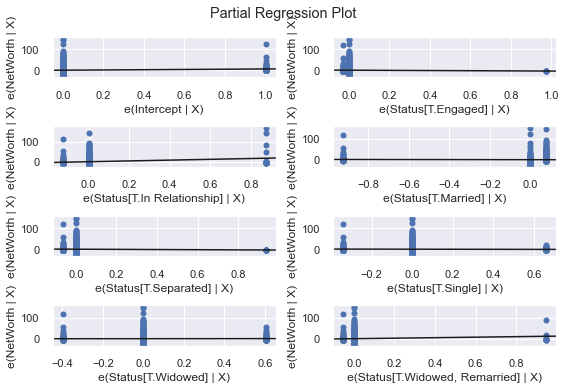

In [42]:
plt.savefig('Partial Regression Plot for Marital status Model.png')
figure2=sm.graphics.plot_partregress_grid(model)
figure2.tight_layout(pad=1.0)

<Figure size 576x396 with 0 Axes>

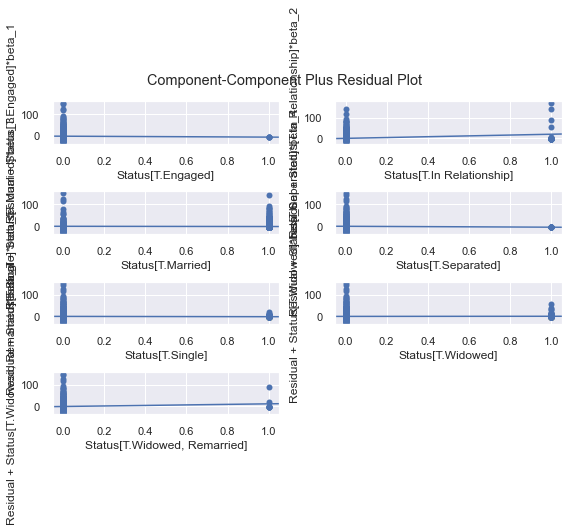

In [43]:
plt.savefig('CCPR Plot for Marital Status Model.png')
figure6=sm.graphics.plot_ccpr_grid(model)
figure6.tight_layout(pad=0.9)

In [44]:
billionaires3=billions1[['NetWorth','Status','Age']]
billionaires3.head()

,NetWorth,Status,Age
0,177.0,In Relationship,57.0
1,151.0,In Relationship,49.0
2,150.0,Married,72.0
3,124.0,Divorced,65.0
4,97.0,Married,36.0


In [45]:
model2= smf.ols('NetWorth ~ Age + Status',data=billionaires3)
model2 = model2.fit()

In [46]:
model2.params

Intercept                        4.898701
Status[T.Engaged]               -3.920869
Status[T.In Relationship]       20.245506
Status[T.Married]               -1.047613
Status[T.Separated]             -3.810052
Status[T.Single]                -1.155663
Status[T.Widowed]                0.376060
Status[T.Widowed, Remarried]    11.930257
Age                              0.014369
dtype: float64

In [47]:
plt.savefig('Age& Marital Status model.png')
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               NetWorth   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     12.80
Date:                Mon, 17 May 2021   Prob (F-statistic):           4.19e-18
Time:                        22:18:46   Log-Likelihood:                -7737.9
No. Observations:                2058   AIC:                         1.549e+04
Df Residuals:                    2049   BIC:                         1.554e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        4.8987      1.487      3.295      0.001       1.983       7.814
Status[T.Engaged]               -3.9209      5.286     -0.742      0.458     -14.287       6.445
Status[T.In Relationship]       20.2455      2.439      8.301      0.000      15.463      25.028
Status[T.Married]               -1.0476      0.907     -1.155      0.248      -2.826       0.731
Status[T.Separated]             -3.8101      3.581     -1.064      0.287     -10.832       3.212
Status[T.Single]                -1.1557      1.520     -0.760      0.447      -4.137       1.825
Status[T.Widowed]                0.3761      1.405      0.268      0.789      -2.379       3.131
Status[T.Widowed, Remarried]    11.9303      3.794      3.145      0.002       4.490      19.370
Age                              0.0144      0.018      0.790      0.429      -0.021       0.050
==============================================================================
Omnibus:                     2697.872   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           494585.263
Skew:                           7.218   Prob(JB):                         0.00
Kurtosis:                      77.561   Cond. No.                     1.54e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Figure size 576x396 with 0 Axes>

In [48]:
model2.rsquared

0.04758259095806627

In [49]:
model2.rsquared_adj

0.043864026159464276

In [50]:
model2.conf_int()

,0,1
Intercept,1.983098,7.814303
Status[T.Engaged],-14.287077,6.445339
Status[T.In Relationship],15.462554,25.028458
Status[T.Married],-2.826078,0.730853
Status[T.Separated],-10.832127,3.212023
Status[T.Single],-4.136651,1.825325
Status[T.Widowed],-2.378674,3.130793
"Status[T.Widowed, Remarried]",4.490331,19.370182
Age,-0.021283,0.050021


In [51]:
model2.pvalues

Intercept                       1.000946e-03
Status[T.Engaged]               4.583139e-01
Status[T.In Relationship]       1.847590e-16
Status[T.Married]               2.481401e-01
Status[T.Separated]             2.874224e-01
Status[T.Single]                4.471725e-01
Status[T.Widowed]               7.889411e-01
Status[T.Widowed, Remarried]    1.686132e-03
Age                             4.293958e-01
dtype: float64

<Figure size 576x396 with 0 Axes>

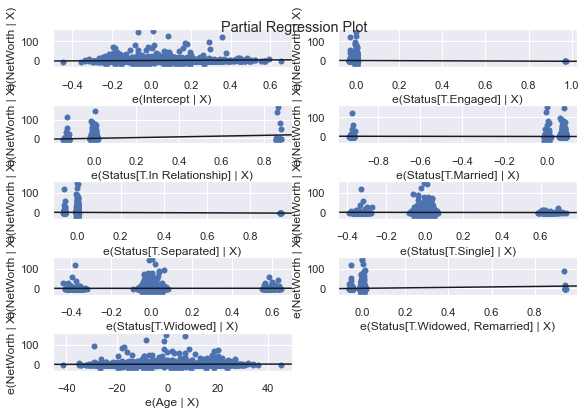

In [52]:
plt.savefig('Partial Regression Plot for Age& Marital Status model.png')
figure3=sm.graphics.plot_partregress_grid(model2)
figure3.tight_layout(pad=0.1)